17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.5788 - loss: 0.6591 - val_accuracy: 0.8059 - val_loss: 0.4307
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.8256 - loss: 0.3927 - val_accuracy: 0.8726 - val_loss: 0.3201
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.8570 - loss: 0.3254 - val_accuracy: 0.8502 - val_loss: 0.3366
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8809 - loss: 0.2854 - val_accuracy: 0.8446 - val_loss: 0.3443
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9020 - loss: 0.2432 - val_accuracy: 0.8632 - val_loss: 0.3181
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8632 - loss: 0.3151
Test Accuracy: 86.32%
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


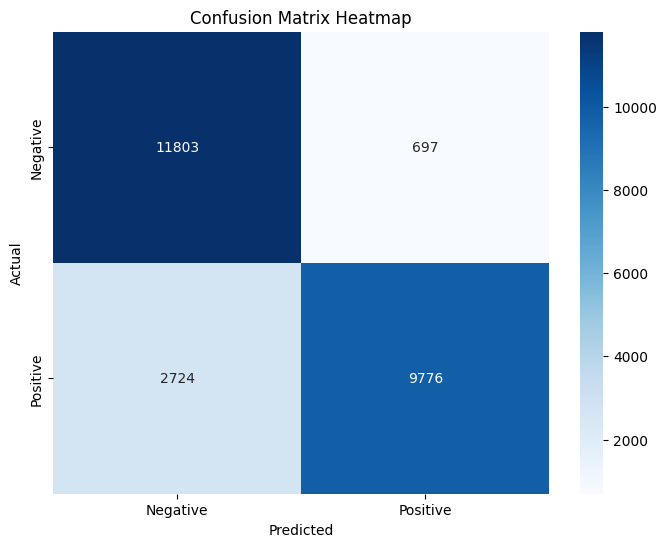

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.metrics import confusion_matrix

# Step 1: Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Step 2: Pad sequences to make sure all reviews are of the same length
x_train = pad_sequences(x_train, padding='post', maxlen=500)
x_test = pad_sequences(x_test, padding='post', maxlen=500)

# Step 3: Build a Deep Neural Network model
model = Sequential()

# Adding embedding layer to convert words into vectors
model.add(Embedding(input_dim=10000, output_dim=128, input_length=500))

# Adding a Global Average Pooling layer to summarize the information
model.add(GlobalAveragePooling1D())

# Adding Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Step 6: Make predictions
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to 0 or 1

# Step 7: Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Plot Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [3]:
# Step 8: Show 5 review predictions
word_index = imdb.get_word_index()
decode = lambda r: ' '.join([k for i in r[:50] for k, v in word_index.items() if v == i - 3])

for i in range(10):
    review = decode(x_test[i])
    print(f"\nReview {i+1}: {review}")
    print("Predicted:", "Positive" if y_pred[i] else "Negative", "| Actual:", "Positive" if y_test[i] else "Negative")


Review 1: please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going
Predicted: Negative | Actual: Negative

Review 2: this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances the sandy dennis character apartment but the film builds to a disturbing climax br br
Predicted: Positive | Actual: Positive

Review 3: at a time when motion picture animation of all sorts was in its br br the political of the russian revolution caused to move to paris where one of his first productions was a dark political satire known as or the who wanted
Predicted: Positive | Actual: Positive

Review 4: i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do t